**Wichtig**:  
* Die einzulesenen Datensätze "process_data_df10.csv" und "process_data_df10.pkl" sollen im Ordner "../Data/" sein!
* Alle in diesem Notebook erzeugten Dateien werden auch in "..Data/" gespeichert.


**Notwendige Packages**: numpy, pandas, re, matplotlib, mpu

---

**Important**: 
* The dataframes "process_data_df10" and "process_data_df10.pkl" have to be in the folder "../Data"!
* All the files produced by this notebook will also be saved in "..Data/"


**Necessary Packages**: numpy, pandas, re, matplotlib, mpu


2nd Project part: Feature Engineering and Data Modeling
===

__Data Analytics für Chemieingenieure und Chemiker__

Tino Mundt, M. Sc.

Prof. Dr. Reinhard Schomäcker

__Group C:__

Frank Rudolf Hilden 364571 - Giam Chon Lee 400646 - Philippe Samuel Santos da Costa 369810 - Julian Felipe Torres Campos 402424 - Elron Elias Pens 371555

__26.01.2020__

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hinzufügen-neuer-Informationen" data-toc-modified-id="Hinzufügen-neuer-Informationen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hinzufügen neuer Informationen</a></span><ul class="toc-item"><li><span><a href="#Einlesen-der-daten" data-toc-modified-id="Einlesen-der-daten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Einlesen der daten</a></span></li><li><span><a href="#Entfernen-von-Reihen-ohne-Produktnamen" data-toc-modified-id="Entfernen-von-Reihen-ohne-Produktnamen-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Entfernen von Reihen ohne Produktnamen</a></span></li><li><span><a href="#Hinzufügen-der-absoluten-und-relativen-Sollwerte" data-toc-modified-id="Hinzufügen-der-absoluten-und-relativen-Sollwerte-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hinzufügen der absoluten und relativen Sollwerte</a></span></li><li><span><a href="#Speichern-als-.csv" data-toc-modified-id="Speichern-als-.csv-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Speichern als .csv</a></span></li></ul></li><li><span><a href="#Varianz-pro-Produkt" data-toc-modified-id="Varianz-pro-Produkt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Varianz pro Produkt</a></span><ul class="toc-item"><li><span><a href="#Removing-unnecessary-features-(columns)" data-toc-modified-id="Removing-unnecessary-features-(columns)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Removing unnecessary features (columns)</a></span></li><li><span><a href="#Removing-incorrect-observations-(rows)" data-toc-modified-id="Removing-incorrect-observations-(rows)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Removing incorrect observations (rows)</a></span></li><li><span><a href="#Exploring-p_product,-p_product_type-and-p_product_group" data-toc-modified-id="Exploring-p_product,-p_product_type-and-p_product_group-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploring <code>p_product</code>, <code>p_product_type</code> and <code>p_product_group</code></a></span></li></ul></li><li><span><a href="#Heat-maps" data-toc-modified-id="Heat-maps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Heat maps</a></span></li></ul></div>

## Hinzufügen neuer Informationen
Zuerst werden die Reihen ohne Produktnamen aus dem bereits bereinigten Datensatz entfernt. Anschließend werden die absolute und relative Sollwerte für Salzrückhalt und Permeatdurchfluss hinzugefügt. Diese Werte sind in der offiziellen Lawabrane - Broschüre zu finden


### Einlesen der daten

In [2]:
import pandas as pd
import numpy as np
import csv

In [4]:
# Daten einlesen
df=pd.read_csv("./Data/process_data_df10.csv", header=[0,1], na_values=['nan'], sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

C:\Users\PhilippeSamuel\Anaconda3\envs\da_chem\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                              \
  ps_dicke_4  ... p_product_type p_product_size p_effective_area_per_leaf_m2   
0      135.0  ...   6989995295da              8                       1.4646   
1      135.0  ...   6989995295da              8                       1.4646   
2      135.0  ...   6989995295da              8                       1.4646   
3      135.0  ...   6989995295da              8                       1.4646   
4      135.0  ...   6989995295da              8                       1.4646   

                                                                 \
  p_effective_pressure_bar qc_flux_l/m2/h qc_a-value_l/m2/h/bar   
0                     8.71      40.286235              4.625285   
1                     8.71      40.252401              4.621401   
2                     8.71      39.718186              4.560067   
3                     8.71      39.441426              4.528292   
4                     8.71      39.731817              4.561632   

                                                                    
  qc_b-value_m/s_10-6 qc_flux_m3/m2/day sum_of_scrap roll_position  
0            3.678446          0.966870          0.0     58.181818  
1            3.165247          0.966058          0.0    116.363636  
2            3.170593          0.953236          0.0    174.545455  
3            2.855092          0.946594          0.0    232.727273  
4            2.810373          0.953564          0.0    290.909091  

[5 rows x 343 columns]

### Entfernen von Reihen ohne Produktnamen

In [5]:
# Zu Beginn alle im DataFrame vorkommenden Produktnamen auslesen
produktnamen=list(df2['qc']['p_product_full_name'])

In [6]:
# Erzeugen eines Arrays, in welches die Sollwerte gemäß Herstellerangaben eingetragen werden
sollwerte=np.zeros((118687,2))

In [7]:
# Info zu df2 vor dem Bereinigen
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118687 entries, 0 to 118686
Columns: 343 entries, (ps, ps) to (qc, roll_position)
dtypes: bool(7), float64(296), int64(4), object(36)
memory usage: 305.0+ MB


In [8]:
# Produktnamen laut Herstellerangaben
# Stimmt der Produktname überein, werden die Sollwerte für den Salrückhalt (linke Spalte) und den Permatdurchsatz (rechte Spalte) eingetragen
# leere Spalten werden in der else-Bedingung aussortiert

for i in range(len(produktnamen)):
    if produktnamen[i]=='a79cf6a73839':
        sollwerte[i]=[99.8, 5.2]
        
    elif produktnamen[i]=='c807697b3c7e':
        sollwerte[i]=[99.8, 24.6]
        
    elif produktnamen[i]=='f22a7fef71c5':
        sollwerte[i]=[99.8, 27.3] 
        
    elif produktnamen[i]=='c13b2f69d3c1':
        sollwerte[i]=[99.8, 7.2]  
        
    elif produktnamen[i]=='3e94b7067349':
        sollwerte[i]=[99.8, 34.1]  
        
    elif produktnamen[i]=='3394d82edc97':
        sollwerte[i]=[99.8, 37.5]  
        
    elif produktnamen[i]=='df9e75b29918':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='316c8d1ffca1':
        sollwerte[i]=[99.5, 43.9]  
        
    elif produktnamen[i]=='5661014763c8':
        sollwerte[i]=[99.5, 8.9]  
        
    elif produktnamen[i]=='73928f2577b5':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='22227b31350f':
        sollwerte[i]=[99.5, 41.5]  
        
    elif produktnamen[i]=='df1d09e643af':
        sollwerte[i]=[99.7, 8.9]  
        
    elif produktnamen[i]=='e2b1e6e1d5f5':
        sollwerte[i]=[99.7, 37.9]  
        
    elif produktnamen[i]=='54b98d0fe2eb':
        sollwerte[i]=[99.5, 41.7]
        
    elif produktnamen[i]=='ff16223eb2bf':
        sollwerte[i]=[99.5, 39.9]
        
    elif produktnamen[i]=='0cc0ba87b12f':
        sollwerte[i]=[99.5, 7.4]        
        
    elif produktnamen[i]=='a640f68db89c':
        sollwerte[i]=[99.5, 34.8]        
        
    elif produktnamen[i]=='b3ccc5e5f9b5':
        sollwerte[i]=[99.5, 36.2]        
        
    elif produktnamen[i]=='2256f65c362b':
        sollwerte[i]=[99.5, 38.3]        
        
    elif produktnamen[i]=='33d21930e431':
        sollwerte[i]=[99.5, 8.2]        
        
    elif produktnamen[i]=='3a0c28c7fc8c':
        sollwerte[i]=[99.5, 38.6]                
        
    elif produktnamen[i]=='630448a85ca3':
        sollwerte[i]=[99.5, 42.6]
    else:
        print(i)
        df2=df2.drop(df2.index[i])
        
        

9723
11598
15501
17752
32413
39389
49116
55882
68301
68491
77866
80634
88800
99333
101312
115985
117371


In [9]:
# Info zu df2 nach dem Bereinigen
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118670 entries, 0 to 118686
Columns: 343 entries, (ps, ps) to (qc, roll_position)
dtypes: bool(7), float64(296), int64(4), object(36)
memory usage: 305.9+ MB


### Hinzufügen der absoluten und relativen Sollwerte

In [10]:
# Erzeugen eines Backups
sollwerte_b=np.copy(sollwerte)
sollwerte_b

array([[99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2],
       ...,
       [99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2]])

In [11]:
# Sollwerte als Array auslesen:
# sollwerte2=Salrückhalt
# sollwerte3=Permatdurchfluss
sollwerte2=sollwerte_b[:,0]
sollwerte3=sollwerte_b[:,1]

In [12]:
# Typvereinfachung -> Teilen einer Liste durch eine Liste (später)
sollwerte_salzr=sollwerte2.tolist()
sollwerte_durchf=sollwerte3.tolist()

In [13]:
# Erneut Überprüfen, ob keine leeren Einträge vorhanden sind
sollwerte_salzr=list(filter(lambda a: a!=0, sollwerte_salzr))
sollwerte_durchf=list(filter(lambda a: a!=0, sollwerte_durchf))

In [14]:
# istwerte als Liste auslesen
ist_salzr=df2['qc']['qc_salzrckhalt']
ist_durchf=df2['qc']['qc_durchfluss']

In [15]:
# relative Abweichung berechnen
# negative %-Zahl: weniger als Sollwert; positive %-Zahl: mehr als der Sollwert
Abw_salzr=(ist_salzr-sollwerte_salzr)/sollwerte_durchf*100
Abw_durchf=(ist_durchf-sollwerte_durchf)/sollwerte_durchf*100

In [16]:
# Hinzufügen der Sollwerte zum DataFrame
df2['Sollwerte','soll_salzr_abs']=sollwerte_salzr
df2['Sollwerte','soll_permeatd_abs']=sollwerte_durchf
df2['Sollwerte', 'soll_salzr_rel']=Abw_salzr
df2['Sollwerte', 'soll_permeatd_rel']=Abw_durchf

In [17]:
df2.head()

ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                            \
  ps_dicke_4  ... qc_flux_l/m2/h qc_a-value_l/m2/h/bar qc_b-value_m/s_10-6   
0      135.0  ...      40.286235              4.625285            3.678446   
1      135.0  ...      40.252401              4.621401            3.165247   
2      135.0  ...      39.718186              4.560067            3.170593   
3      135.0  ...      39.441426              4.528292            2.855092   
4      135.0  ...      39.731817              4.561632            2.810373   

                                                    Sollwerte  \
  qc_flux_m3/m2/day sum_of_scrap roll_position soll_salzr_abs   
0          0.966870          0.0     58.181818           99.5   
1          0.966058          0.0    116.363636           99.5   
2          0.953236          0.0    174.545455           99.5   
3          0.946594          0.0    232.727273           99.5   
4          0.953564          0.0    290.909091           99.5   

                                                      
  soll_permeatd_abs soll_salzr_rel soll_permeatd_rel  
0              36.2      -0.123927          1.707208  
1              36.2       0.083994          1.621790  
2              36.2       0.064419          0.273103  
3              36.2       0.186600         -0.425610  
4              36.2       0.213790          0.307515  

[5 rows x 347 columns]

In [18]:
df2['Sollwerte']

,soll_salzr_abs,soll_permeatd_abs,soll_salzr_rel,soll_permeatd_rel
0,99.5,36.2,-0.123927,1.707208
1,99.5,36.2,0.083994,1.621790
2,99.5,36.2,0.064419,0.273103
3,99.5,36.2,0.186600,-0.425610
4,99.5,36.2,0.213790,0.307515
...,...,...,...,...
118682,99.5,36.2,-0.262752,-8.737486
118683,99.5,36.2,-0.129304,-10.007924
118684,99.5,36.2,-0.255097,-11.920763
118685,99.5,36.2,-0.041934,-4.767057


### Speichern als .csv

In [19]:
df2.to_csv('process_data_df11.csv')

## Varianz pro Produkt

In [20]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6,5]
pd.options.display.max_columns = None
sns.set(style="ticks", color_codes=True)

In [21]:
df = pd.read_pickle('./Data/process_data_df10.pkl')

### Removing unnecessary features (columns)
`pa_coating` is a dummy variable and doesn't belong to the original collected data. For further analysis it can be dropped.

In [22]:
n_rows = df.shape[0]
# select columns that have more than 90% of missing values
manyNaNs = [col[1] for col in df.columns if df[col].isna().sum()/n_rows > 0.9]

colsToRemove = ['pa_coating'] + manyNaNs

# drop the selected columns
df1 = df.copy()
df1.drop(labels=colsToRemove,axis='columns',level=1,inplace=True)

# Let's check whether the variables where succesfully removed:

# Check if any elements of colsToRemove is in df
print('Are any of the `colsToRemove` in `df`?')
print('  ',any([i for i in colsToRemove if i in df.columns.get_level_values(level=1)]))
print('\n')

# Check if any elements of colsToRemove is in df1
print('Are any of the `colsToRemove` in `df1`?')
print('  ',any([i for i in colsToRemove if i in df1.columns.get_level_values(level=1)]))

Are any of the `colsToRemove` in `df`?
   True


Are any of the `colsToRemove` in `df1`?
   False


### Removing incorrect observations (rows)

In [23]:
df2 = df1.copy()
# Removes the first level of the multiindex 
df2 = df2.droplevel(level= 0, axis='columns')
# Remove observations where `qc_salzrckhalt` == 0 or `qc_durchfluss` == 0
df2.query('qc_salzrckhalt>0 & qc_durchfluss>0',inplace=True)

In [24]:
df2.dtypes.value_counts()

float64                294
object                  15
datetime64[ns, UTC]     10
datetime64[ns]           9
bool                     7
int64                    4
category                 1
dtype: int64

### Exploring `p_product`, `p_product_type` and `p_product_group` 
Now we could keep removing unnecessary columns, but let's focus on the feature we want to keep/analyse. 

The 1st question is: 
> Do the features `qc_salzrckhalt` and `qc_durchfluss` vary significantly among different `p_product`, `p_product_type` and `p_product_group`? 

In [25]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY = df2.loc[:,['nr'] + groupCols + goalCols]

In [29]:
(XY
 .groupby(groupCols)[goalCols]
 .describe(percentiles=[.5])
 .loc[:,(slice(None),['mean','std'])]
)

# Or more generally:
# groupCols = ['p_product_group','p_product_type','p_product']
# goalCols  = ['qc_salzrckhalt','qc_durchfluss']

# (XY
#  .groupby(groupCols)[goalCols]
#  .describe()
# )

qc_salzrckhalt            \
                                                           mean       std   
p_product_group     p_product_type p_product                                
Brackwasserelemente 5200bdfc01a1   B400 HP            99.710801  0.178502   
                                   B440 HP            99.680525  0.274059   
                    6989995295da   B085 LE 4040       99.587711  0.558698   
                                   B400 LE            99.597574  0.817313   
                                   B400 LE ASD        99.594492  0.408559   
                                   B440 LE            99.655607  0.705622   
                    6d2830b1e76d   B085 HF 4040       99.747199  0.851215   
                                   B400 HF            99.725208  0.606740   
                                   B440 HF            99.709252  0.423277   
                    c77cb1692e0e   B085 ULP 4040      99.481307  0.127754   
                                   B400 ULP ASD       99.447599  2.260389   
                                   B440 ULP           99.487571  2.190241   
                    f187928fdb22   B370 FR            99.754400  0.531778   
                                   B400 FR ASD        99.778475  0.111351   
                    f8ba29e9058b   B085 FR 4040       99.751843  0.569136   
                                   B400 FR            99.698430  0.943967   
Seewasserelemente   320144db7b4b   S085 HF 4040       99.593242  0.322570   
                                   S400 HF            99.661606  0.121766   
                                   S440 HF            99.564647  0.250485   
                    cd7216b44ce3   S085 HR 4040       99.622799  0.192800   
                                   S400 HR            99.550429  0.283806   
                                   S440 HR            99.673094  0.126316   

                                                 qc_durchfluss            
                                                          mean       std  
p_product_group     p_product_type p_product                              
Brackwasserelemente 5200bdfc01a1   B400 HP           47.430731  4.933277  
                                   B440 HP           54.348608  6.059473  
                    6989995295da   B085 LE 4040       7.868664  0.783317  
                                   B400 LE           36.109638  2.457657  
                                   B400 LE ASD       38.475563  3.242915  
                                   B440 LE           41.042630  4.313453  
                    6d2830b1e76d   B085 HF 4040      10.217395  1.450472  
                                   B400 HF           45.837838  5.614436  
                                   B440 HF           47.629521  4.765416  
                    c77cb1692e0e   B085 ULP 4040      8.316075  0.941071  
                                   B400 ULP ASD      41.915975  6.179667  
                                   B440 ULP          46.233789  6.493993  
                    f187928fdb22   B370 FR           40.967887  3.688570  
                                   B400 FR ASD       46.994425  2.782082  
                    f8ba29e9058b   B085 FR 4040      10.180787  1.228733  
                                   B400 FR           45.075786  5.419690  
Seewasserelemente   320144db7b4b   S085 HF 4040       7.158628  0.425344  
                                   S400 HF           34.972416  5.160947  
                                   S440 HF           39.709322  3.077885  
                    cd7216b44ce3   S085 HR 4040       6.344866  0.827814  
                                   S400 HR           28.270457  4.239466  
                                   S440 HR           25.871263  1.561641

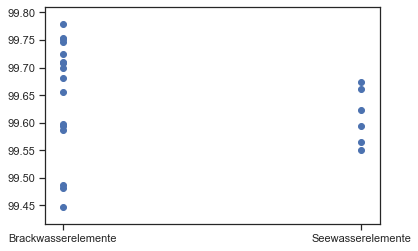

In [30]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_std  = XY.groupby(groupCols)[goalCols].std()

smry= XY_mean.join(XY_std,
      lsuffix='_mean',
      rsuffix='_std')

dir(smry.index)

smry.index.get_level_values(level='p_product_group')

fig1 = plt.figure(figsize=[6,4])
plt.scatter(smry.index.get_level_values(level='p_product_group'),smry['qc_salzrckhalt_mean'])
plt.show()

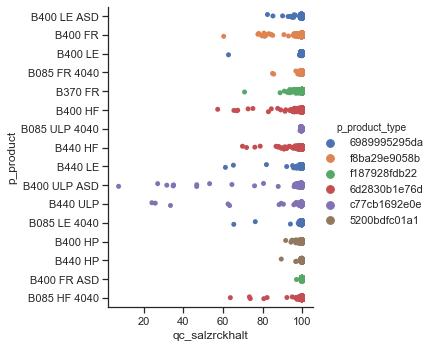

In [31]:
#sns.catplot(y='p_product_type',x='qc_salzrckhalt',hue='p_product_group',data=XY)
sns.catplot(y='p_product',x='qc_salzrckhalt',hue='p_product_type',data=XY[XY['p_product_group'] == 'Brackwasserelemente'])
plt.show()

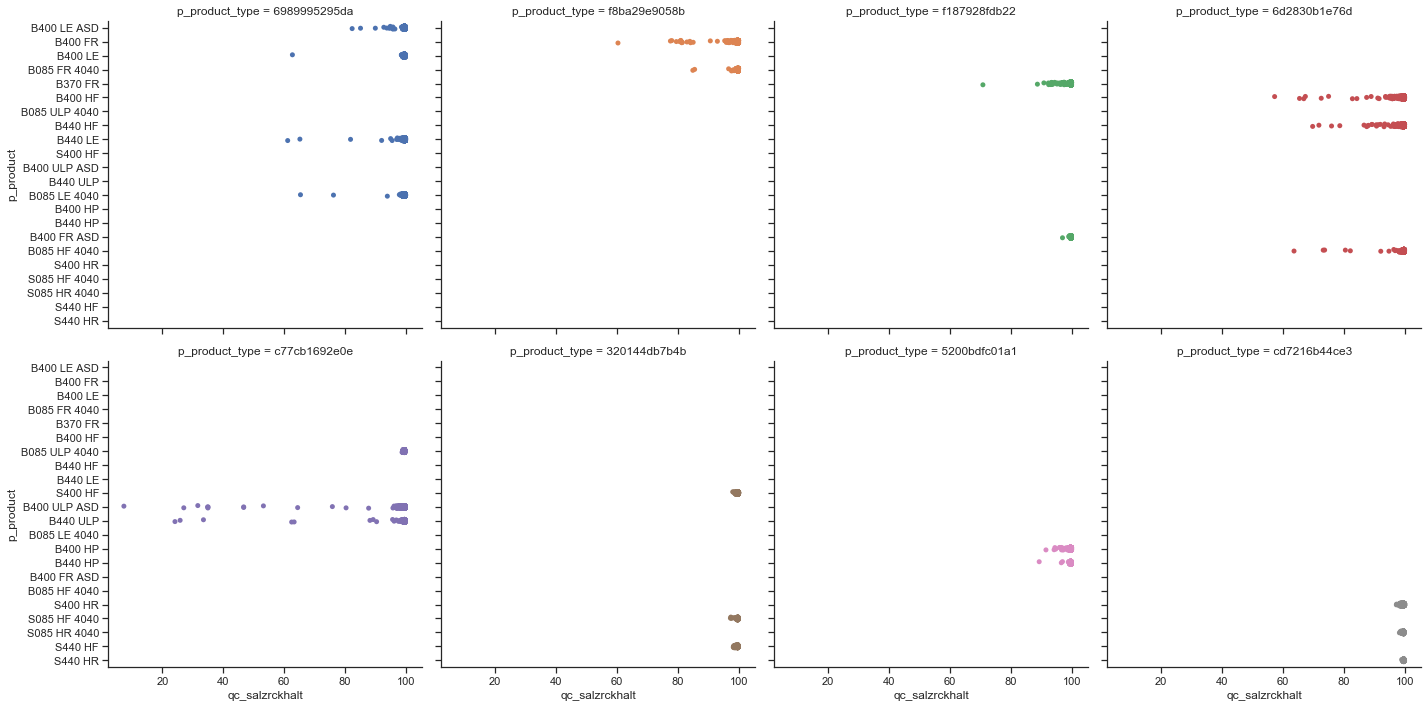

In [32]:
(XY
 .dropna()                   # drop missing values
 .pipe((sns.catplot,'data'),
       y='p_product',x='qc_salzrckhalt',col='p_product_type',col_wrap = 4,hue='p_product_type',kind='strip'))

plt.show()

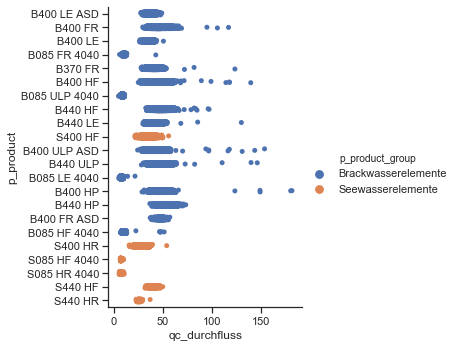

In [33]:
(XY
 .dropna()
 .pipe((sns.catplot,'data'),
       x='qc_durchfluss',y='p_product',hue='p_product_group'))
plt.show()

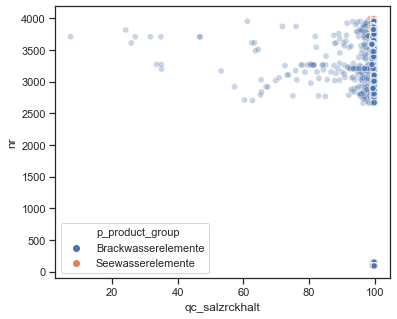

In [34]:
fig, ax = plt.subplots()
ax = (XY
 .query("qc_salzrckhalt>0")
 .dropna()
 .pipe((sns.scatterplot,'data'),
       x='qc_salzrckhalt',y='nr',hue='p_product_group',alpha=0.3))
plt.show()

## Heat maps

In [36]:
#import the libraries
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt #Data Visualization 
# import seaborn as sns  #Python library for Vidualization
import sklearn
#import csv

In [51]:
# Daten einlesen
df=pd.read_csv("process_data_df11.csv", header=[0,1], na_values=['nan'], sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

                                                     \
  ps_dicke_4 ps_dicke_bs ps_raum_temperatur_start_c   
0      135.0       134.0                       24.0   
1      135.0       134.0                       24.0   
2      135.0       134.0                       24.0   
3      135.0       134.0                       24.0   
4      135.0       134.0                       24.0   

                                                             \
  ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
0                               19.0                   19.7   
1                               19.0                   19.7   
2                               19.0                   19.7   
3                               19.0                   19.7   
4                               19.0                   19.7   

                                                      \
  ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
0                     20.6                      21.1   
1                     20.6                      21.1   
2                     20.6                      21.1   
3                     20.6                      21.1   
4                     20.6                      21.1   

                                                       \
  ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
0                      21.6                      22.0   
1                      21.6                      22.0   
2                      21.6                      22.0   
3                      21.6                      22.0   
4                      21.6                      22.0   

                                                       \
  ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
0                      22.2                      22.5   
1                      22.2                      22.5   
2                      22.2                      22.5   
3                      22.2                      22.5   
4                      22.2                      22.5   

                                                       \
  ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
0                      22.6                      22.9   
1                      22.6                      22.9   
2                      22.6                      22.9   
3                      22.6                      22.9   
4                      22.6                      22.9   

                                                                  \
  ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
0                         57.0                              78.0   
1                         57.0                              78.0   
2                         57.0                              78.0   
3                         57.0                              78.0   
4                         57.0                              78.0   

                                                        

In [56]:
df3 =df2.copy()
#df3 = df3.droplevel(level= 0, axis='columns')

In [57]:
df3=df3.select_dtypes(include=['float64','int'])

In [58]:
df3=df3[(df3['Sollwerte']['soll_salzr_rel']>10) & (df3['Sollwerte']['soll_salzr_rel']<100)]

In [60]:
df3_ps=df3.drop(columns=['pa','ass','qc'])
df3_pa=df3.drop(columns=['ps','ass','qc'])
df3_ass=df3.drop(columns=['ps','pa','qc'])
df3_qc=df3.drop(columns=['ps','pa','ass'])
df3_ps.head()

C:\Users\PhilippeSamuel\Anaconda3\envs\da_chem\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [46]:
df3_ps

Empty DataFrame
Columns: [(ps, ps_beschichtete_rollenlange_m), (ps, ps_c_losung_wt_%), (ps, ps_gap_micro_m), (ps, ps_dicke_as_micro_m), (ps, ps_dicke_1), (ps, ps_dicke_2), (ps, ps_dicke_3), (ps, ps_dicke_4), (ps, ps_dicke_bs), (ps, ps_raum_temperatur_start_c), (ps, ps_auftragsbank_temperatur_start_c), (ps, ps_bad_temperatur_0m_c), (ps, ps_bad_temperatur_500m_c), (ps, ps_bad_temperatur_1000m_c), (ps, ps_bad_temperatur_1500m_c), (ps, ps_bad_temperatur_2000m_c), (ps, ps_bad_temperatur_2500m_c), (ps, ps_bad_temperatur_3000m_c), (ps, ps_bad_temperatur_3500m_c), (ps, ps_bad_temperatur_4000m_c), (ps, ps_raum-feuchtigkeit_start_%), (ps, ps_auftragswerk_feuchtigkeit_0m_%), (ps, ps_auftragswerk_feuchtigkeit_600m_%), (ps, ps_auftragswerk_feuchtigkeit_1200m_%), (ps, ps_auftragswerk_feuchtigkeit_1800m_%), (ps, ps_auftragswerk_feuchtigkeit_2400m_%), (ps, ps_auftragswerk_feuchtigkeit_3000m_%), (ps, ps_auftragswerk_feuchtigkeit_3600m_%), (ps, ps_auftragswerk_feuchtigkeit_4200m_%), (ps, ps_out_m), (ps, ps_scrap_%), (ps, ps_f_auftragswerk_median), (ps, ps_dicke_median), (Sollwerte, soll_salzr_abs), (Sollwerte, soll_permeatd_abs), (Sollwerte, soll_salzr_rel), (Sollwerte, soll_permeatd_rel)]
Index: []

In [43]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_ps.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_ps.pdf')

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 2880x2160 with 0 Axes>